In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
sns.set_theme()

## Reading Data

In [2]:
edu = pd.read_csv("./Files & Data/educ_uoe_fine06_linear.csv", na_values=":", usecols=["TIME_PERIOD", "geo", "OBS_VALUE"])

In [3]:
edu.head()

,geo,TIME_PERIOD,OBS_VALUE
0,AT,2012,0.54
1,AT,2013,0.55
2,AT,2014,0.58
3,AT,2015,0.58
4,AT,2016,0.60


In [4]:
edu.tail()

,geo,TIME_PERIOD,OBS_VALUE
4959,UK,2012,0.0
4960,UK,2013,NaN
4961,UK,2014,NaN
4962,UK,2015,NaN
4963,UK,2016,NaN


In [5]:
edu.describe()

,TIME_PERIOD,OBS_VALUE
count,4964.000000,4007.000000
mean,2015.499799,1.023689
std,2.255716,1.160252
min,2012.000000,0.000000
25%,2014.000000,0.370000
50%,2015.000000,0.740000
75%,2017.000000,1.160000
max,2019.000000,7.380000


## Selecting Data

In [6]:
# Selecting a subset of columns and rows using the labels 
# as a reference instead of positions

edu.loc[90:94, ['TIME_PERIOD', "OBS_VALUE"]]

,TIME_PERIOD,OBS_VALUE
90,2015,0.70
91,2016,0.69
92,2017,0.70
93,2018,0.69
94,2019,0.67


## Filtering Data

Another way to select a subset of data is by applying Boolean indexing

In [7]:
edu[edu['OBS_VALUE'] > 6.5].tail() # return the last 5 records whose OBS_VALUE is greater than 6.5

,geo,TIME_PERIOD,OBS_VALUE
926,SE,2015,7.05
927,SE,2016,7.13
928,SE,2017,7.06
929,SE,2018,7.18
930,SE,2019,7.06


Boolean indexing uses the result of a Boolean operation over the data, returning a mask with True or False for each row. The rows marked True in the mask will be selected.

NOTE: Any of the Boolean operations can be used for filtering: <, <=, >, >=, =, !=

## Filtering Missing Data

Pandas uses the special value NaN to represent missing values. In python, NaN is a special floating-point value returned by certain operations when one of their results ends in an undefined value. 

NOTE: No two NaN are ever equal. Because of this, the only safe way to tell whether a value is missing in a DataFrame is by using the `isnull()` function.

In [8]:
edu[edu["OBS_VALUE"].isnull()].head() # Return the first 5 records whose "OBS_VALUE" is NaN

,geo,TIME_PERIOD,OBS_VALUE
69,EU27_2020,2012,NaN
70,EU27_2020,2013,NaN
240,BG,2012,NaN
241,BG,2013,NaN
242,BG,2014,NaN


## Manipulating Data

The most straightforward operations that we can use to manipulate data is to use **aggregation functions**. The result of all these functions applied to a row or column is always a number. If the one of the functions is applied to a DataFrame or a selection of rows and columns, then you can specify if the function should be applied to the the rows for each column (setting the `axis=0` keyword), or is should be applied on the columns for each row (setting the `axis=1` keyword)

#### Common aggregation functions

| Function | Description| 
|----------|------------|
|count()   | Number of non-null observations|
|sum()     |Sum of values|
|mean()    | Mean of values|
|median()  | Arithmetic median of values|
|min()     | Minimum value| 
|max()     | Maximum value| 
|prod()    | Product of values|
|std()     | Unbiased standard deviation|
|var()     | Unbiased variance|


In [9]:
edu.max(axis=0)

geo              UK
TIME_PERIOD    2019
OBS_VALUE      7.38
dtype: object

In python, `NaN` values propagate through all operations without raising an exception. In constrast, Pandas operations exclude `NaN` values representing missing data. 

In [10]:
print("Pandas max function: ", edu["OBS_VALUE"].max())
print("Python max function: ", max(edu["OBS_VALUE"])) # Meant to output NaN

Pandas max function:  7.38
Python max function:  7.38


We can apply any function to a DataFrame or Series just setting its name as the argument of the `apply` method.

In [11]:
s = edu["OBS_VALUE"].apply(np.sqrt)
s.head()

0    0.734847
1    0.741620
2    0.761577
3    0.761577
4    0.774597
Name: OBS_VALUE, dtype: float64

In [12]:
# Lambda functions can also be used
r = edu["OBS_VALUE"].apply(lambda x: x**x)
r.head()

0    0.716956
1    0.719780
2    0.729102
3    0.729102
4    0.736022
Name: OBS_VALUE, dtype: float64

We can add a new column buy using index notation

In [13]:
edu["OBS_VALUE_NORM"] = edu["OBS_VALUE"]/edu["OBS_VALUE"].max()
edu.head()

,geo,TIME_PERIOD,OBS_VALUE,OBS_VALUE_NORM
0,AT,2012,0.54,0.073171
1,AT,2013,0.55,0.074526
2,AT,2014,0.58,0.078591
3,AT,2015,0.58,0.078591
4,AT,2016,0.60,0.081301


To remove the column from the dataset we can use the `drop()` method

In [14]:
edu.drop("OBS_VALUE_NORM", axis=1, inplace = True) # axis=1 removes column, axis=0 remove row (but index must be provided)
edu.head()

,geo,TIME_PERIOD,OBS_VALUE
0,AT,2012,0.54
1,AT,2013,0.55
2,AT,2014,0.58
3,AT,2015,0.58
4,AT,2016,0.60


If we want to insert a new row at the bottom of the DataFrame, we can use Pandas' `pd.concat()` function. This function recieves as an argument an array containing the dataframe and new row to be concatenated. This new row is represented as a dictionary where each key represents a column and each value a row. 

In [15]:
new = pd.DataFrame({"TIME_PERIOD": ["2011"], "OBS_VALUE": ["5.00"], "geo": "CZ"})
edu = pd.concat([edu, new], ignore_index=True, )
edu.tail()

,geo,TIME_PERIOD,OBS_VALUE
4960,UK,2013,NaN
4961,UK,2014,NaN
4962,UK,2015,NaN
4963,UK,2016,NaN
4964,CZ,2011,5.00


If we want to remove this new row, we can use the `drop()` function again.

In [16]:
edu.drop(max(edu.index), axis = 0, inplace = True)
edu.tail()

,geo,TIME_PERIOD,OBS_VALUE
4959,UK,2012,0.0
4960,UK,2013,NaN
4961,UK,2014,NaN
4962,UK,2015,NaN
4963,UK,2016,NaN


We can use the `dropna()` method to remove rows with missing values.

eduDrop = edu.dropna(how="any", subset=["OBS_VALUE"])
eduDrop

Conversely, we can use the `fillna()` method to fill them with another value.

In [20]:
eduFilled = edu.fillna(value={"OBS_VALUE": 0})
eduFilled.tail()

,geo,TIME_PERIOD,OBS_VALUE
4959,UK,2012,0.0
4960,UK,2013,0.0
4961,UK,2014,0.0
4962,UK,2015,0.0
4963,UK,2016,0.0


## Sorting

We can sort a DataFrame using the `sort_values` function

In [26]:
edu.sort_values(by="OBS_VALUE", ascending=False, inplace=True)
edu.head()

,geo,TIME_PERIOD,OBS_VALUE
923,SE,2012,7.38
830,IS,2012,7.24
929,SE,2018,7.18
924,SE,2013,7.17
925,SE,2014,7.14


Sorting based on `TIME_PERIOD`

In [28]:
edu.sort_values(by="TIME_PERIOD", ascending=False, inplace=True)
edu.head()

,geo,TIME_PERIOD,OBS_VALUE
291,EE,2019,NaN
7,AT,2019,0.43
3812,DE,2019,0.15
2420,MT,2019,1.09
299,ES,2019,0.16


If we want to sort return to the original order, we can sort according to the index using the `sort_index` function and specifying `axis=0`

In [29]:
edu.sort_index(axis=0, ascending=True, inplace=True)
edu.head()

,geo,TIME_PERIOD,OBS_VALUE
0,AT,2012,0.54
1,AT,2013,0.55
2,AT,2014,0.58
3,AT,2015,0.58
4,AT,2016,0.6


## Grouping Data

Another very useful way to inspect data is to group it according to some criteria. Pandas has the `groupby` function that allows us to do exactly this. The value returned by this function is a special grouped DataFrame. To have a proper DataFrame as a result, it is necessary to apply an aggregation function. Thus, this function will be applied to all the values in the same group.

In [38]:
group = edu[["geo", "OBS_VALUE"]].groupby("geo").mean()
group.head()

,OBS_VALUE
geo,
AT,1.029191
BE,1.637426
BG,0.786763
CH,1.049239
CY,1.305760


## Rearrranging Data

We can transform the arrangement of our data, redistributing the indexes and columns for better manipulation of our data, which normally lead to better performance. We can rearrange our data using the `pivot_table` function. Here, we can specify which columns will be the new indexes, the new values, and the new columns. 

For example, imagine that we want to transform our DataFrame to a spreadsheet-like structure with the coutry names as the index, while the columns will be the years starting from 2013 and the values will be the previous `OBS_VALUE` column. To do this, first we need to filter out the data and then pivot it in this way:

In [44]:
filtered_data = edu[edu["TIME_PERIOD"] > 2012] 
pivedu = pd.pivot_table(filtered_data, values = "OBS_VALUE" , index = ["geo"], columns= ["TIME_PERIOD"])
pivedu.head()

TIME_PERIOD,2013,2014,2015,2016,2017,2018,2019
geo,,,,,,,
AT,1.072941,1.051765,1.054118,1.045294,1.021765,0.988824,0.905882
BE,1.646154,1.628462,1.611538,1.583077,1.688333,1.675833,1.655833
BG,0.774444,0.800556,0.747778,0.735000,0.809412,0.859375,0.890000
CH,0.721000,1.107333,1.114000,1.105333,1.175714,1.107857,NaN
CY,1.424000,1.403333,1.261176,1.311250,1.323333,1.276000,1.214000


Now we can use the new index to select specific rows by label, using the `loc` operator:

In [46]:
pivedu.loc[["UK", "CY"], [2014, 2018]]

TIME_PERIOD,2014,2018
geo,,
UK,1.255625,1.055625
CY,1.403333,1.276000


Pivot also offers the option of providing an argument `aggr_function` that allows us to perform an aggregation function between the values if thereis more than one value for the given row and column after the transformation. As usual, you can design any custom function u want, just giving its name or using a lambda function.

## Ranking Data

Another useful visualization feature is to rank data. To see this, we will use the pandas `rank` function.

In [50]:
pivedu = pivedu.drop(["EU27_2020", "EU28"], axis=0) 
pivedu = pivedu.dropna()
pivedu.rank(ascending = False, method='first').head()

TIME_PERIOD,2013,2014,2015,2016,2017,2018,2019
geo,,,,,,,
AT,12.0,12.0,11.0,11.0,13.0,14.0,17.0
BE,2.0,1.0,1.0,1.0,1.0,1.0,1.0
BG,23.0,23.0,25.0,25.0,21.0,19.0,18.0
CY,4.0,3.0,7.0,6.0,7.0,7.0,7.0
CZ,26.0,26.0,23.0,22.0,24.0,22.0,20.0


In [56]:
totalSum = pivedu.sum(axis=1)
totalSum.rank(ascending = False, method='dense').sort_values().head()

geo
BE    1.0
PT    2.0
FI    3.0
NO    4.0
SE    5.0
dtype: float64

## Plotting

Pandas DataFrames and Series can be plotted using the `plot` function, which uses the library for graphics Matplotlib. If we want to plot the accumulated values for each country over the last 6 years, we can take the Series obtained in the previous example and plot it directly by calling the `plot` function.

<AxesSubplot:title={'center':'Total Values for Country'}, xlabel='geo'>

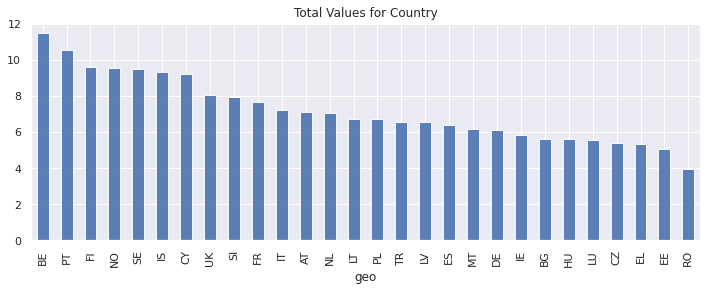

In [72]:
totalSum = pivedu.sum(axis=1).sort_values(ascending=False)
totalSum.plot(kind="bar", style="b", alpha=0.9, title="Total Values for Country", figsize=(12,4))

It is also possible to plot a dataframe directly

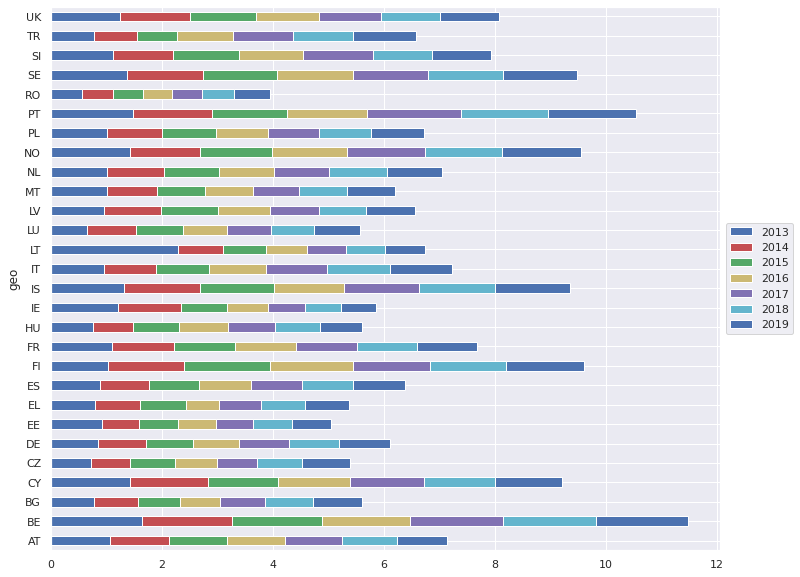

In [75]:
my_colors = ["b", 'r', 'g', 'y', 'm', 'c']
ax = pivedu.plot(kind='barh', stacked=True, color=my_colors, figsize=(12,10)) 
ax.legend(loc="center left", bbox_to_anchor = (1, .5))